### Preprocessing

In [20]:
# import relevant statistical packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [21]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 11.a. Generating a response $Y$ with two predictors $X1$ and $X2$, with $n$=100

In [22]:
X1 = np.random.normal(size=100)
X2 = np.random.normal(size=100)
epsilon = np.random.normal(scale=2.5, size=100)
Y = -12.5 + 35.7*X1 - 23.4*X2 + epsilon

### 11.b. Generating $\hat{\beta}$

In [23]:
beta1 = 25.7

### 11.c. Keeping $\hat{\beta}$ and fitting the model, $Y - \hat{\beta_1}X_1 = \beta_0 + \beta_2X_2 + \epsilon$

In [24]:
a2 = Y - beta1*X1

In [25]:
lm2 = LinearRegression(fit_intercept=True).fit(X2.reshape(-1, 1), a2)
beta2 = lm2.coef_[0]

### 11.d. Keeping $\hat{\beta_2}$ fixed and fitting the model, $Y - \hat{\beta_2}X_2 = \beta_0 + \beta_1X_1 + \epsilon$

In [26]:
a1 = Y - beta2*X2

In [27]:
lm1 = LinearRegression(fit_intercept=True).fit(X1.reshape(-1, 1), a1)
beta1 = lm1.coef_[0]

In [28]:
lm1.intercept_, lm2.intercept_

(-12.473345091716988, -12.840530671162014)

In [29]:
beta1, beta2

(35.89515102612931, -23.17557947319832)

### 11.d. Estimating $\hat{\beta_0}$, $\hat{\beta_1}$ and $\hat{\beta_2}$

In [36]:
n = 1000
beta0 = np.zeros(n)
beta1 = np.zeros(n)
beta2 = np.zeros(n)

In [47]:
beta1[0] = 25.7
for k in range(0, n):
    a2 = Y - beta1[k]*X1
    lm2 = LinearRegression(fit_intercept=True).fit(X2.reshape(-1, 1), a2)
    beta2[k] = lm2.coef_[0]
    a1 = Y - beta2[k]*X2
    lm1 = LinearRegression(fit_intercept=True).fit(X1.reshape(-1, 1), a1)
    if k<n-1:
        beta1[k+1] = lm1.coef_[0]
    beta0[k] = lm1.intercept_

In [48]:
betadf = pd.concat([pd.DataFrame(beta0), pd.DataFrame(beta1), pd.DataFrame(beta2)], axis=1)
betadf.columns = ['beta0', 'beta1', 'beta2']
betadf.head()

,beta0,beta1,beta2
0,-12.473345,25.700000,-23.175579
1,-12.474105,35.895151,-23.297111
2,-12.474106,35.896213,-23.297124
3,-12.474106,35.896213,-23.297124
4,-12.474106,35.896213,-23.297124


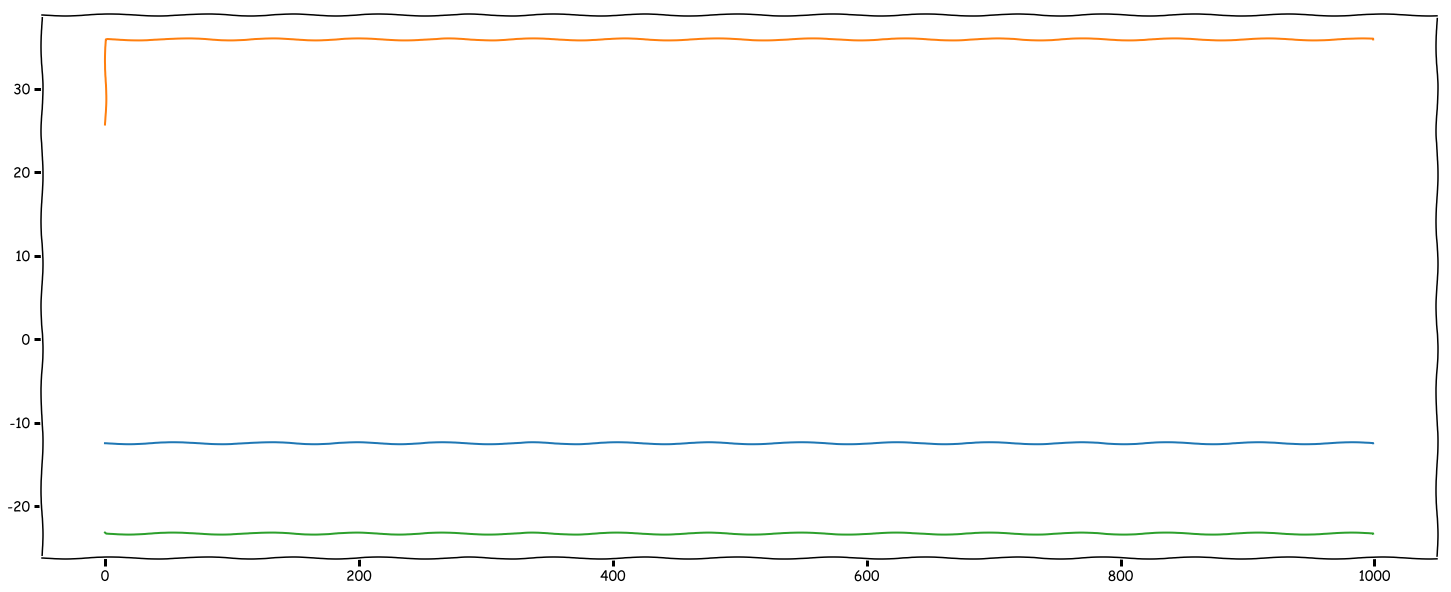

In [49]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(betadf)

**The coefficients attaing their least square values quite quickly.**

### 11.f. Performing multiple linear regression tp predict $Y$ using $X1$ and $X2$

In [52]:
df = pd.concat([pd.DataFrame(Y), pd.DataFrame(X1), pd.DataFrame(X2)], axis=1)
df.columns = ['Y', 'X1', 'X2']
df.head()

,Y,X1,X2
0,-46.612660,-1.318130,-0.407617
1,-25.078121,-0.811585,-0.772090
2,-104.776458,-2.207525,0.555130
3,4.788800,0.197218,-0.346450
4,-1.860992,0.057349,-0.459433


In [57]:
lmreg = LinearRegression().fit(df[['X1', 'X2']], df['Y'])
coef = pd.DataFrame([lmreg.coef_])
intercept = pd.DataFrame([lmreg.intercept_])

In [59]:
allval = pd.concat([intercept, coef], axis=1)
allval.columns = ['beta0', 'beta1', 'beta2']
allval

,beta0,beta1,beta2
0,-12.474106,35.896213,-23.297124


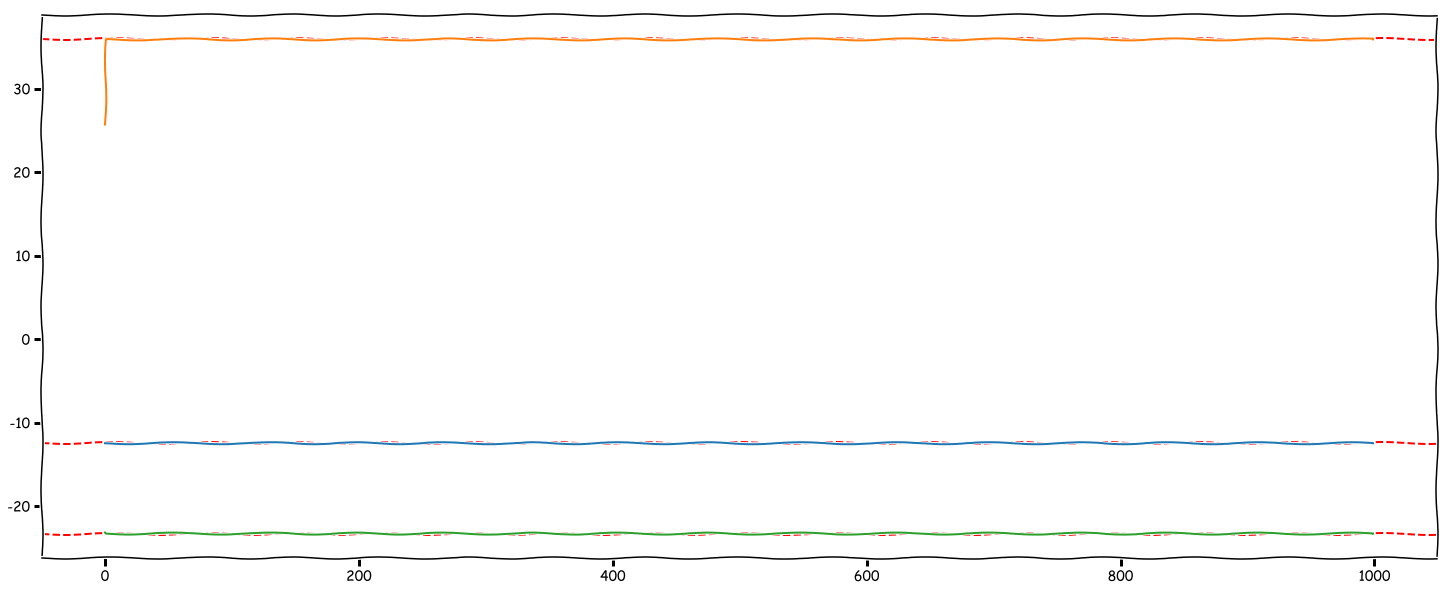

In [83]:
plt.xkcd()
plt.figure(figsize=(25, 10))
[plt.axhline(k , 0, 1000, lw=2, linestyle='--', c='r') for k in [-12.474106, 35.896213, -23.297124]]
plt.plot(betadf)


**So, we can see that *backfitting* provides similar estimates for coefficient values as that of performing multiple linear regression.**

### 11.g. Number of backfitting iterations required to obtain a "good" approximation to the multiple regression coefficient estimates 

**The first value was close enough. So, just one backfitting iteration sufficed. However, it's always a good idea to have multiple iterations to get a good estimation.**